## Previsão de cancelamento de conta em e-commerce (churn) a fim de realizar ações preventivas
 - Projeto de Disciplina - Redes neurais com TensorFlow [25E3_2]
 - Aluna: Rosana Ribeiro Lima
 - Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

------
### Pitch de negócio

##### Problema:

Com frequência, diversas empresas perdem receitas por cancelamento de clientes insatisfeitos, sejam empresas de telecomunicações, de streaming, bancos, e-commerce, entre outras. Sabe-se que o custo da aquisição de um novo cliente é maior do que o custo de manutenção dos clientes atuais (ações de marketing, campanhas, ações promocionais, etc). Mas muitas vezes, esse acompanhamento e monitoramento da saúde do relacionamento com o cliente é algo difícil.

Seria útil para as empresas se elas pudessem saber previamente quais clientes estão mais propensos ao cancelamento de um serviço, para que assim possam realizar ações preventivas mais direcionadas a esse cliente.

##### Solução proposta:
A solução proposta por este trabalho visa analisar o dataset em questão e utilizá-lo como base para criar um modelo de redes neurais que permita identificar a probabilidade de cancelamento do serviço (churn) pelo cliente, com base em dados fornecidos pela empresa. A ideia e o objetivo é treinar um modelo sensível aos clientes com tendência ao cancelamento (construir um modelo com alto recall) para então fornecer a inferência de dados por meio de uma API que a empresa possa consultar sempre que desejado (por exemplo, uma vez ao mês). Assim, sempre que a API retornar que o cliente tem alta chance de cancelamento, a empresa poderá tomar as ações que julgar necessárias para tentar evitar tal cancelamento, como o fornecimento de cupons, a entrega de brindes, o fornecimento de serviços ou benefícios adicionais, o contato para colheita de feedbacks, entre outros. 



In [150]:
import os
import pandas as pd
import numpy as np

path = "../data/"

arquivo_xlsx = 'ECommerceDataset.xlsx'

df = pd.read_excel(os.path.join(path, arquivo_xlsx), sheet_name='E Comm')

df.to_csv(os.path.join(path,'ecommerce-churn.csv'), index=False)

df.head(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [151]:
df['SatisfactionScore'].value_counts()

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

In [152]:
df.shape

(5630, 20)

In [153]:
df['HourSpendOnApp'].value_counts()

HourSpendOnApp
3.0    2687
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: count, dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [155]:
# Remover dados nulos
df = df.dropna() 

# Remover duplicatas
df = df.drop_duplicates(subset='CustomerID', keep='first') # limpar duplicatas, se houver
df.shape


(3774, 20)

In [156]:
df = df.drop(['CustomerID'], axis=1)
df.columns


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [157]:
print(df['PreferredLoginDevice'].value_counts())
print('-------------')
print(df['PreferredPaymentMode'].value_counts())
print('-------------')
print(df['Gender'].value_counts())


PreferredLoginDevice
Mobile Phone    1936
Computer        1111
Phone            727
Name: count, dtype: int64
-------------
PreferredPaymentMode
Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: count, dtype: int64
-------------
Gender
Male      2271
Female    1503
Name: count, dtype: int64


In [158]:
print('-------------')
print(df['HourSpendOnApp'].value_counts())

-------------
HourSpendOnApp
3.0    1897
2.0     936
4.0     912
1.0      25
5.0       3
0.0       1
Name: count, dtype: int64


In [159]:
print('-------------')
print(df['PreferedOrderCat'].value_counts())
print('-------------')
print(df['MaritalStatus'].value_counts())
print('-------------')
print(df['CityTier'].value_counts())


-------------
PreferedOrderCat
Laptop & Accessory    1961
Mobile Phone          1227
Fashion                443
Mobile                 119
Others                  18
Grocery                  6
Name: count, dtype: int64
-------------
MaritalStatus
Married     1982
Single      1245
Divorced     547
Name: count, dtype: int64
-------------
CityTier
1    2368
3    1265
2     141
Name: count, dtype: int64


In [160]:

colunas_categoricas = ['PreferredLoginDevice', 'PreferredPaymentMode', 
                       'Gender', 'PreferedOrderCat','MaritalStatus']
df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=False, dtype=int)
df.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [161]:
print("====Dataframe após tratamento inicial====")
print(df.shape)

====Dataframe após tratamento inicial====
(3774, 35)


In [162]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  3774 non-null   int64  
 1   Tenure                                 3774 non-null   float64
 2   CityTier                               3774 non-null   int64  
 3   WarehouseToHome                        3774 non-null   float64
 4   HourSpendOnApp                         3774 non-null   float64
 5   NumberOfDeviceRegistered               3774 non-null   int64  
 6   SatisfactionScore                      3774 non-null   int64  
 7   NumberOfAddress                        3774 non-null   int64  
 8   Complain                               3774 non-null   int64  
 9   OrderAmountHikeFromlastYear            3774 non-null   float64
 10  CouponUsed                             3774 non-null   float64
 11  OrderCoun

In [163]:
df['Churn'].value_counts()

Churn
0    3143
1     631
Name: count, dtype: int64

In [164]:
(df['Churn'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'

Churn
0    83.28%
1    16.72%
Name: proportion, dtype: object

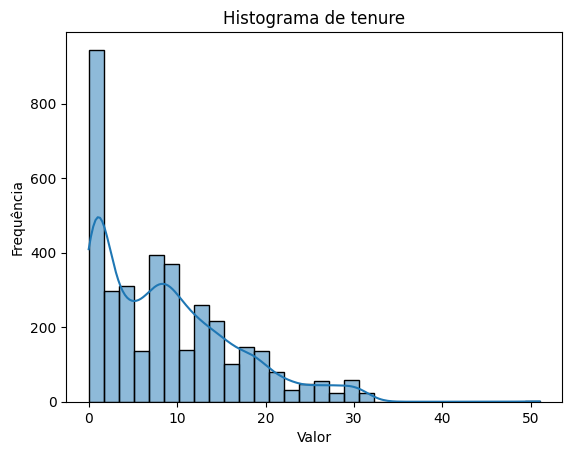

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  3774 non-null   int64  
 1   Tenure                                 3774 non-null   float64
 2   CityTier                               3774 non-null   int64  
 3   WarehouseToHome                        3774 non-null   float64
 4   HourSpendOnApp                         3774 non-null   float64
 5   NumberOfDeviceRegistered               3774 non-null   int64  
 6   SatisfactionScore                      3774 non-null   int64  
 7   NumberOfAddress                        3774 non-null   int64  
 8   Complain                               3774 non-null   int64  
 9   OrderAmountHikeFromlastYear            3774 non-null   float64
 10  CouponUsed                             3774 non-null   float64
 11  OrderCoun

In [165]:



import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], bins=30, kde=True)
plt.title('Histograma de tenure')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()
print(df.info())

# como temos histogramas não normalizados, podemos usar a mediana, que é uma medida mais robusta, para preencher os dados vazios.

In [166]:
import numpy as np
import random
import tensorflow as tf
import os

# Fixar seed
SEED = 202

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)



from sklearn.model_selection import train_test_split

# vamos agora separar os dados de treino, teste e validação, fazer a mediana dos valores faltantes com os dados de treino e aplicá-los também
# nos dados de teste e validação, para evitar data leakage.

X = df.drop('Churn', axis=1)
y = df['Churn']

# Primeiro, separamos os dados de treino/validação (80%) e um conjunto de teste (20%).
# O conjunto de teste ficará separado para evitar data leakage na análise exploratória dos dados.
# Faremos a análise exploratória somente no dataframe contendo dados de treino e validação.
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)


print(f"Formato dos dados de treino/validação: {X_temp.shape}")

print(f"Formato dos dados de teste: {X_test.shape}")

print(f"==========================")
print(f"Distribuição do target de treino/validação: ")
print(y_temp.value_counts())

print(f"==========================")
print(f"Distribuição do target de teste: ")
print(y_test.value_counts())



Formato dos dados de treino/validação: (2641, 34)
Formato dos dados de teste: (1133, 34)
Distribuição do target de treino/validação: 
Churn
0    2199
1     442
Name: count, dtype: int64
Distribuição do target de teste: 
Churn
0    944
1    189
Name: count, dtype: int64


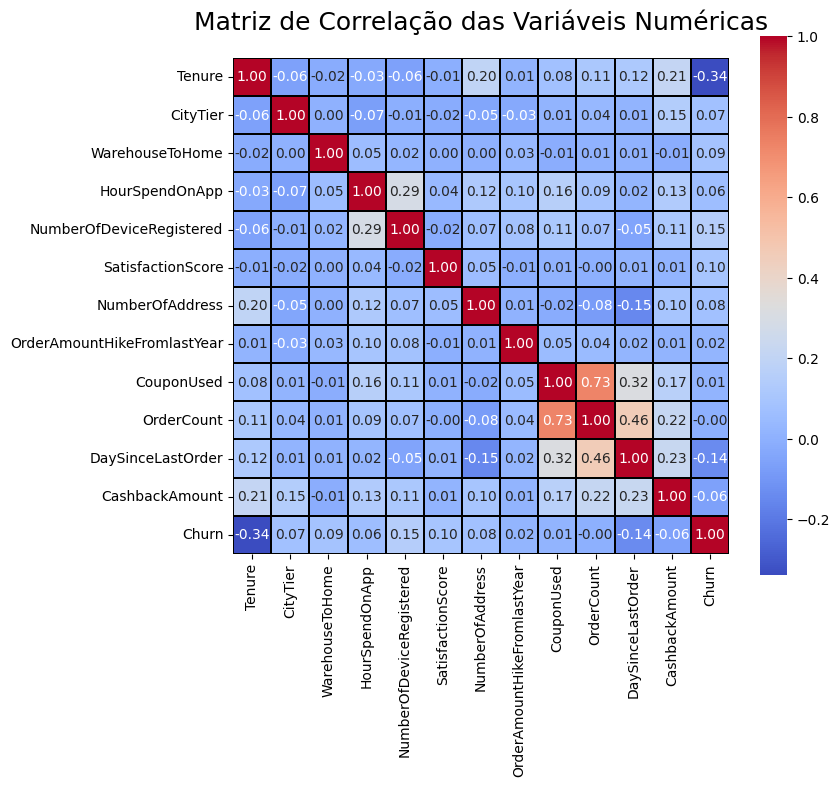

Features numéricas relevantes (pré-multicolinearidade): ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']


/tmp/ipykernel_3764755/3193780595.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='coolwarm')


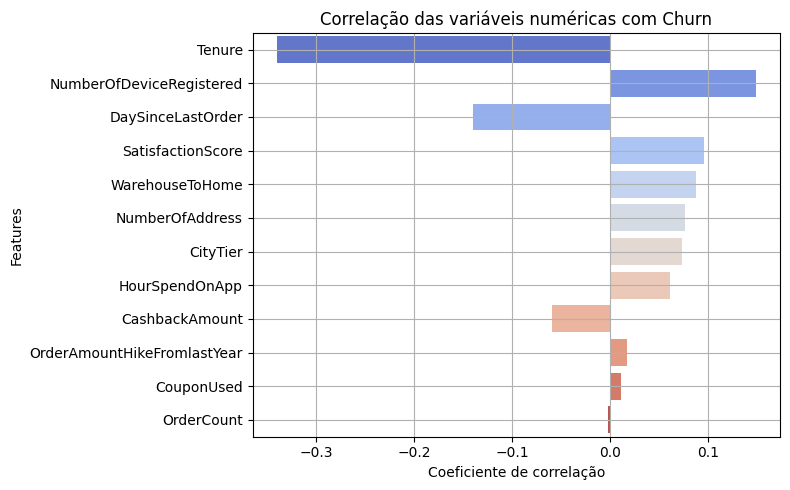

Features removidas por alta correlação: set()
Features numéricas finais: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
Features categóricas relevantes: ['Complain', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Single', 'MaritalStatus_Married', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_E wallet', 'PreferredLoginDevice_Computer', 'PreferredPaymentMode_Debit Card', 'Gender_Male', 'Gender_Female', 'PreferredPaymentMode_Credit Card']


/tmp/ipykernel_3764755/3193780595.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3764755/3193780595.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3764755/3193780595.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3764755/3193780595.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3764755/3193780595.py:130

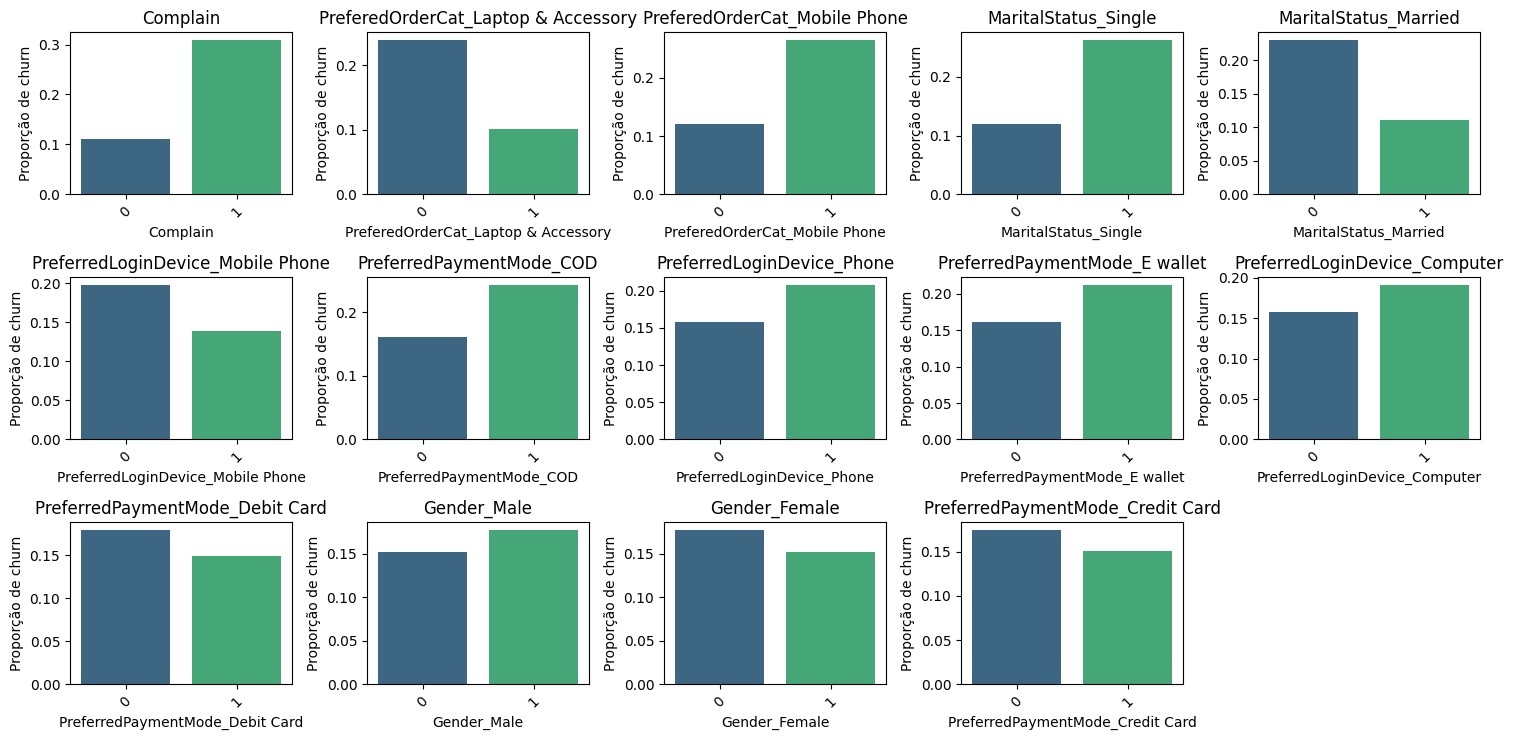


Lista final de features relevantes para o modelo (numéricas + categóricas):
['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'Complain', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Single', 'MaritalStatus_Married', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_E wallet', 'PreferredLoginDevice_Computer', 'PreferredPaymentMode_Debit Card', 'Gender_Male', 'Gender_Female', 'PreferredPaymentMode_Credit Card']


In [167]:
# if not isinstance(y_train, pd.Series):
#     y_train = pd.Series(y_train, name='Churn')

df_temp = pd.concat([X_temp, y_temp], axis=1)
df_temp.shape

df_temp.columns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# ======================
# 1. Definir variáveis numéricas e categóricas
# ======================
colunas_numericas = [
    'Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered',
    'SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed',
    'OrderCount','DaySinceLastOrder','CashbackAmount'
]

df_numeric = df[colunas_numericas + ['Churn']].copy()
df_categoricas = df.drop(columns=colunas_numericas + ['Churn']).copy()

# ======================
# 2. Variáveis numéricas → Correlação
# ======================

corr_matrix = df_numeric.corr(numeric_only=True)
correlations = corr_matrix['Churn'].drop('Churn')

f, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(
    corr_matrix,
    # mask=np.triu(np.ones(corr_matrix.shape), k=1),  # evita duplicados
    linewidth=0.25,
    cmap="coolwarm",
    linecolor='Black',
    square=True,
    annot=True,  # mostra valores
    fmt=".2f"
)
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=18, pad=20)
plt.show()

correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Filtra por limite mínimo de correlação
limite_min_corr = 0.03
features_num_relevantes = correlations[correlations.abs() >= limite_min_corr].index.tolist()

print("Features numéricas relevantes (pré-multicolinearidade):", features_num_relevantes)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='coolwarm')
plt.title('Correlação das variáveis numéricas com Churn')
plt.xlabel('Coeficiente de correlação')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

# ======================
# 3. Remover multicolinearidade das numéricas
# ======================
df_filtrado = df_numeric[features_num_relevantes]

corr_matrix = df_filtrado.corr().abs()
mask = np.triu(np.ones(corr_matrix.shape), k=1)


colunas_remover = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.9:
            colname = corr_matrix.columns[j]  # remove sempre a segunda do par
            colunas_remover.add(colname)

features_num_final = [f for f in features_num_relevantes if f not in colunas_remover]

print("Features removidas por alta correlação:", colunas_remover)
print("Features numéricas finais:", features_num_final)

# ======================
# 4. Variáveis categóricas → Teste qui-quadrado
# ======================
resultados_categoricas = []
for col in df_categoricas.columns:
    tabela = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(tabela)
    resultados_categoricas.append({'feature': col, 'p_valor': p})

resultados_categoricas = pd.DataFrame(resultados_categoricas).sort_values('p_valor')

# Filtra por significância
limite_pvalor = 0.08
features_cat_relevantes = resultados_categoricas[resultados_categoricas['p_valor'] < limite_pvalor]['feature'].tolist()

print("Features categóricas relevantes:", features_cat_relevantes)

# Visualização das taxas de churn por categoria
# for col in features_cat_relevantes:
#     plt.figure(figsize=(8,4))
#     churn_rates = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
#     sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")
#     plt.title(f"Taxa média de Churn por categoria - {col}")
#     plt.ylabel("Proporção de churn")
#     plt.xlabel(col)
#     plt.xticks(rotation=45)
#     plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de variáveis categóricas
n_cols = 5   # número de colunas de subplots
n_rows = math.ceil(len(features_cat_relevantes) / n_cols)  # calcula o número de linhas

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2.5*n_rows))

# Se axes for 1D, transforma em array para indexar facilmente
axes = axes.flatten()

for i, col in enumerate(features_cat_relevantes):
    churn_rates = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    
    sns.barplot(
        x=churn_rates.index, 
        y=churn_rates.values, 
        palette="viridis", 
        ax=axes[i]
    )
    axes[i].set_title(f"{col}")
    axes[i].set_ylabel("Proporção de churn")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=45)

# Remove subplots vazios (caso o nº de categorias não ocupe toda a grid)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



# ======================
# 5. Juntar numéricas + categóricas
# ======================
features_relevantes = features_num_final + features_cat_relevantes

print("\n=========================")
print("Lista final de features relevantes para o modelo (numéricas + categóricas):")
print(features_relevantes)


In [168]:
print("Features para remover por alta correlação:")
print(colunas_remover)

features_relevantes.remove('Gender_Male')



Features para remover por alta correlação:
set()


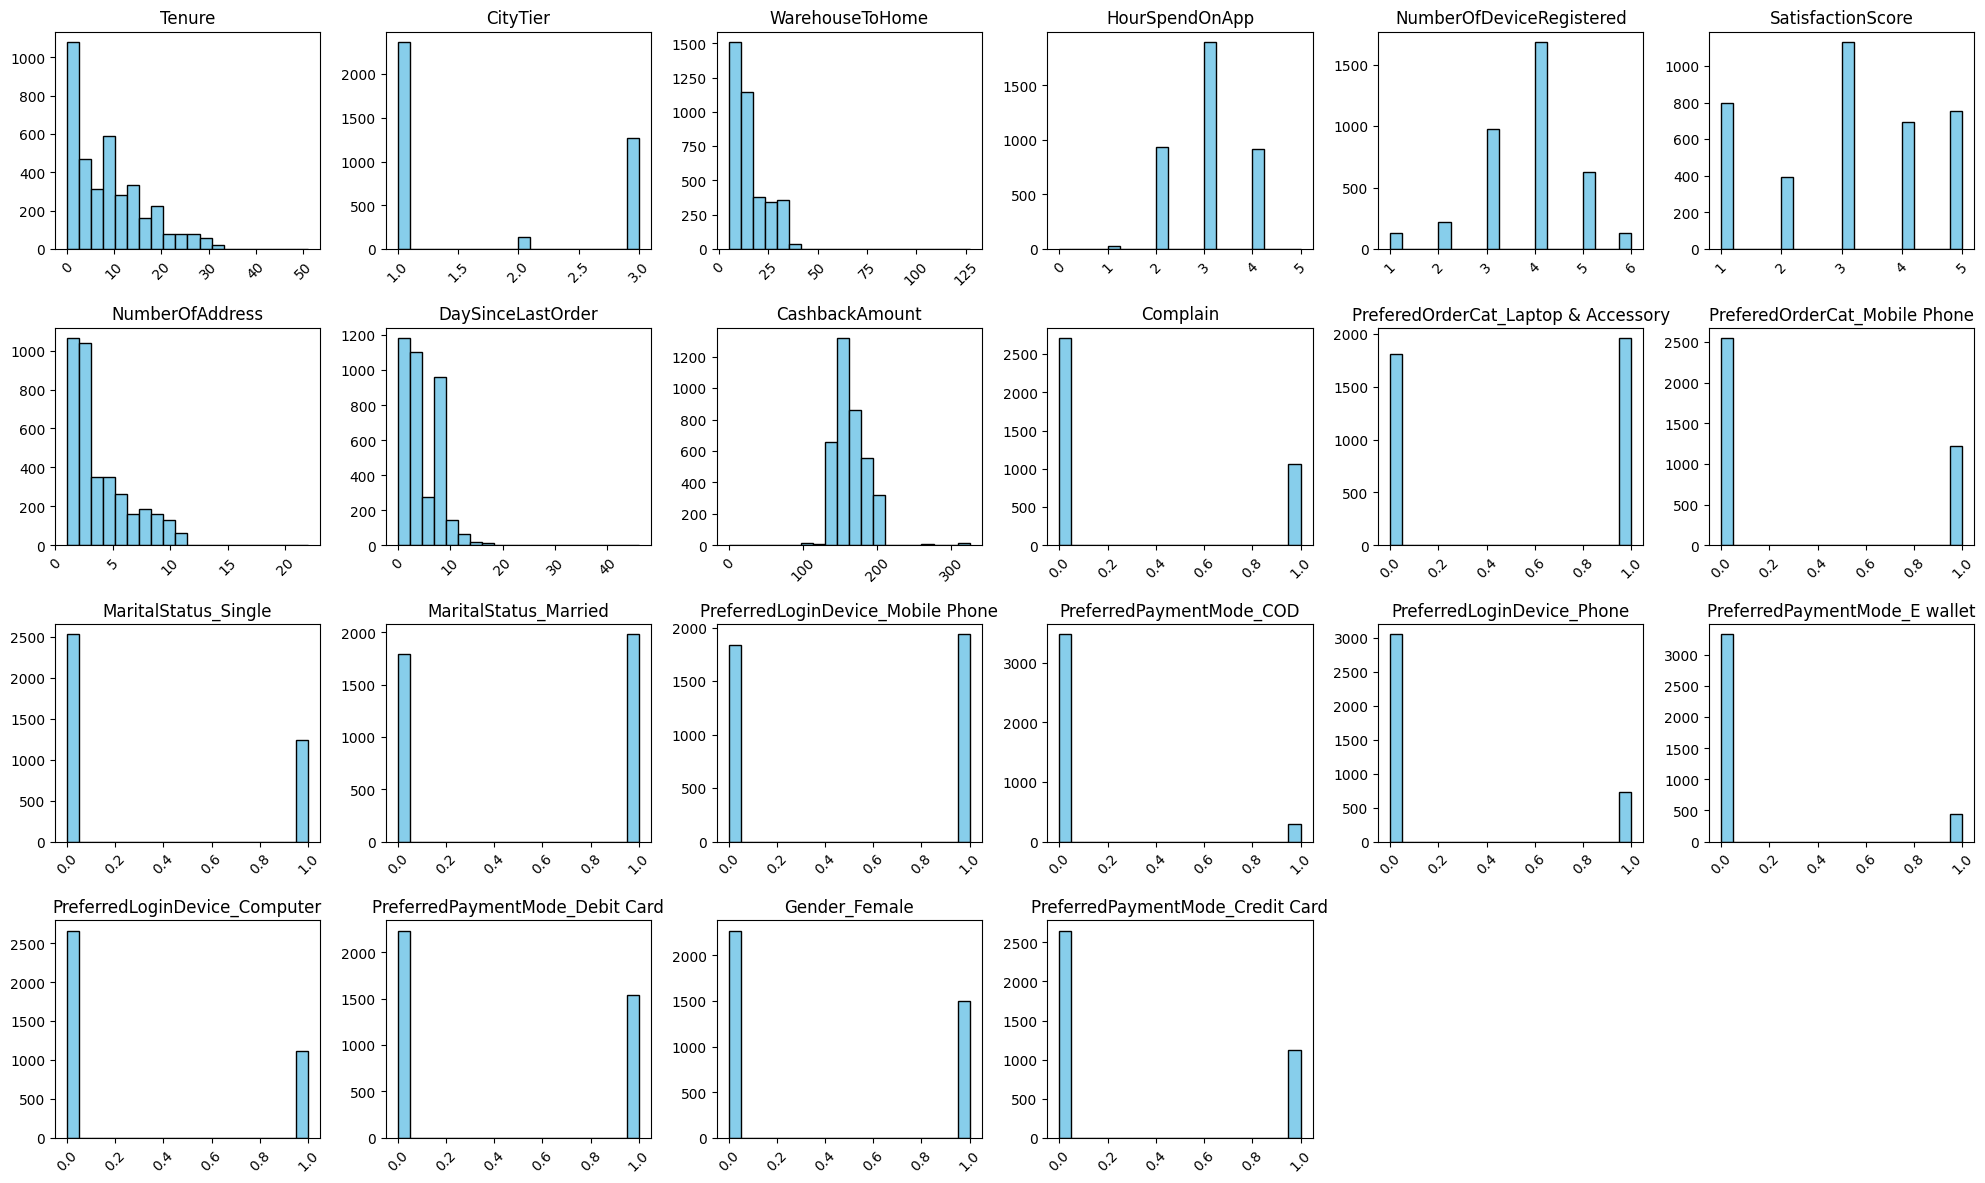

In [169]:
import matplotlib.pyplot as plt
import math

# features_list = X_temp_selected_features.columns[:22].tolist()  # ajuste conforme seu df
n_features = len(features_relevantes)

n_cols = 6
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features_relevantes):
    axes[i].hist(df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)

# Remove eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.title('Análise da distribuição das features selecionadas - dados de treino e validação')
plt.show()



In [170]:



X_test_selected_features = X_test[features_relevantes]
X_temp_selected_features = X_temp[features_relevantes]
print(features_relevantes)

['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'Complain', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Single', 'MaritalStatus_Married', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_E wallet', 'PreferredLoginDevice_Computer', 'PreferredPaymentMode_Debit Card', 'Gender_Female', 'PreferredPaymentMode_Credit Card']


In [171]:
X_temp_selected_features['PreferedOrderCat_Laptop & Accessory'].head()

4660    1
1974    0
565     1
620     1
5310    1
Name: PreferedOrderCat_Laptop & Accessory, dtype: int64

In [172]:
y_temp.head()

4660    0
1974    0
565     0
620     0
5310    0
Name: Churn, dtype: int64

In [173]:

print(f"Formato dos dados de treino/validação após seleção das features: {X_temp_selected_features.shape}")
print(f"Formato dos dados de teste após seleção das features: {X_test_selected_features.shape}")

Formato dos dados de treino/validação após seleção das features: (2641, 22)
Formato dos dados de teste após seleção das features: (1133, 22)


In [174]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
import numpy as np
import tensorflow as tf
from keras import layers
from sklearn.utils import class_weight
import pandas as pd
import random

# Definir uma SEED para reprodutibilidade
SEED = 202
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Número de folds
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

# Função para construir o modelo
def create_model(input_dim, hidden_layers, dropout_rate, optimizer_name, learning_rate=0.01,
                 output_activation='sigmoid', intermediate_activation='relu', loss_type='binary_crossentropy'):
    inputs = tf.keras.Input(shape=(input_dim,))
    x = inputs

    # Criação dinâmica das camadas ocultas
    for units in hidden_layers:
        x = layers.Dense(units, activation=intermediate_activation)(x)
        if dropout_rate > 0:
            x = layers.Dropout(dropout_rate)(x)

    outputs = layers.Dense(1, activation=output_activation)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="Churn_Predictor_NN")

    # Escolha do otimizador
    if optimizer_name == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    elif optimizer_name == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    elif optimizer_name == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)

    elif optimizer_name == "adagrad":
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)

    elif optimizer_name == "adadelta":
        optimizer = tf.keras.optimizers.Adadelta(learning_rate=learning_rate)

    elif optimizer_name == "adamax":
        optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)

    elif optimizer_name == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    elif optimizer_name == "ftrl":
        optimizer = tf.keras.optimizers.Ftrl(learning_rate=learning_rate)

    else:
        raise ValueError("Optimizer não suportado")

    # Adiciona precisão no compile
    model.compile(
        optimizer=optimizer,
        loss=loss_type,
        metrics=['accuracy', tf.keras.metrics.Recall(name="recall"), tf.keras.metrics.Precision(name="precision")]
    )
    return model

# EarlyStopping
es_fold = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=50,
    min_delta=0.0001,
    restore_best_weights=True
)

# Diferentes configurações para testar
configurations = [

    # {"hidden_layers": [32, 16], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "relu", "loss_type": "binary_crossentropy"},
    # {"hidden_layers": [32, 16, 8], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "relu", "loss_type": "binary_crossentropy"},    
    # {"hidden_layers": [32, 16, 4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "relu", "loss_type": "binary_crossentropy"},    

    # {"hidden_layers": [32, 16], "dropout": 0.1, "optimizer": "adam", "output_activation": "tanh", "intermediate_activation": "relu", "loss_type": "binary_crossentropy"},
    # {"hidden_layers": [32, 16, 8], "dropout": 0.1, "optimizer": "adam", "output_activation": "tanh", "intermediate_activation": "relu", "loss_type": "binary_crossentropy"},    
    # {"hidden_layers": [32, 16, 4], "dropout": 0.1, "optimizer": "adam", "output_activation": "tanh", "intermediate_activation": "relu", "loss_type": "binary_crossentropy"},    
#     {"hidden_layers": [64, 32, 8, 4], "dropout": 0.05, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#      {"hidden_layers": [64, 32, 8, 4], "dropout": 0.05, "optimizer": "rmsprop", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#      {"hidden_layers": [64, 32, 8, 4], "dropout": 0.05, "optimizer": "sgd", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#       {"hidden_layers": [64, 32, 8, 4], "dropout": 0.05, "optimizer": "adagrad", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#    {"hidden_layers": [64, 32, 8, 4], "dropout": 0.05, "optimizer": "adadelta", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#    {"hidden_layers": [64, 32, 8, 4], "dropout": 0.05, "optimizer": "nadam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},



#     {"hidden_layers": [64, 16, 16, 8, 4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#     {"hidden_layers": [64, 32, 8, 4,2], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#     {"hidden_layers": [64, 16, 4, 2], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},    
#     {"hidden_layers": [64, 40, 32, 16,4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#     {"hidden_layers": [64, 32, 32, 16,4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#     {"hidden_layers": [64, 32, 32, 8,4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#    {"hidden_layers": [64, 32, 8, 2], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},  
#     {"hidden_layers": [64, 40, 32, 16,4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
# {"hidden_layers": [64, 32, 8, 4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
   
#     # {"hidden_layers": [32, 16], "dropout": 0.1, "optimizer": "adam", "output_activation": "tanh", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},
#     # {"hidden_layers": [32, 16, 8], "dropout": 0.1, "optimizer": "adam", "output_activation": "tanh", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},    
#     # {"hidden_layers": [32, 16, 4], "dropout": 0.1, "optimizer": "adam", "output_activation": "tanh", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},  
#     # {"hidden_layers": [32, 16, 8, 4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},  
#     # # {"hidden_layers": [32, 16, 4, 2], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},  
#     # {"hidden_layers": [32, 16, 8, 2], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},  
#     # {"hidden_layers": [64, 32, 8, 4], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},  
#     # {"hidden_layers": [32, 16, 4, 2], "dropout": 0.1, "optimizer": "adam", "output_activation": "sigmoid", "intermediate_activation": "tanh", "loss_type": "binary_crossentropy"},  



    # Exemplo de configuração adicional com ativação diferente e loss type MSE (se aplicável para o seu problema)
    # ATENÇÃO: 'mse' geralmente não é apropriado para classificação binária. Use 'binary_crossentropy'
    # para classificação binária e 'categorical_crossentropy' ou 'sparse_categorical_crossentropy'
    # para classificação multiclasse.
    # {"hidden_layers": [10], "dropout": 0.0, "optimizer": "adam", "output_activation": "linear", "intermediate_activation": "tanh", "loss_type": "mse"},
]

results = []


# # Loop pelas configurações
# for config in configurations:
#     print(f"\n===== Testando configuração: {config} =====")
#     scores_config = []

#     for fold, (train_idx, val_idx) in enumerate(skf.split(X_temp_selected_features, y_temp)):
#         print(f"\n--- Fold {fold+1}/{n_splits} ---")

#         # Divisão dos dados
#         X_train_fold, X_val_fold = X_temp_selected_features.iloc[train_idx], X_temp_selected_features.iloc[val_idx]
#         y_train_fold, y_val_fold = y_temp.iloc[train_idx], y_temp.iloc[val_idx]

#         # Escalonamento SEM vazamento
#         scaler_fold = RobustScaler()
#         X_train_scaled_fold = scaler_fold.fit_transform(X_train_fold)
#         X_val_scaled_fold = scaler_fold.transform(X_val_fold)

#         # Class weights
#         cw_fold = class_weight.compute_class_weight(
#             'balanced',
#             classes=np.unique(y_train_fold),
#             y=y_train_fold
#         )
#         cw_fold = {i: cw_fold[i] for i in range(len(cw_fold))}

#         # Criar modelo com as novas configurações
#         model_fold = create_model(
#             input_dim=X_train_scaled_fold.shape[1],
#             hidden_layers=config["hidden_layers"],
#             dropout_rate=config["dropout"],
#             optimizer_name=config["optimizer"],
#             learning_rate=0.01,
#             output_activation=config["output_activation"],
#             intermediate_activation=config["intermediate_activation"],
#             loss_type=config["loss_type"]
#         )

#         # Treinar
#         model_fold.fit(
#             X_train_scaled_fold, y_train_fold,
#             validation_data=(X_val_scaled_fold, y_val_fold),
#             epochs=1200,
#             batch_size=X_train_scaled_fold.shape[0],
#             class_weight=cw_fold,
#             verbose=0,
#             callbacks=[es_fold]
#         )

#         # Avaliação
#         score_fold = model_fold.evaluate(X_val_scaled_fold, y_val_fold, verbose=0)  
#         # score = [loss, accuracy, recall, precision]
#         scores_config.append(score_fold)

#     scores_config = np.array(scores_config)
#     mean_loss, mean_acc, mean_recall, mean_precision = scores_config[:,0].mean(), scores_config[:,1].mean(), scores_config[:,2].mean(), scores_config[:,3].mean()
#     mean_f1 = 2 * (mean_precision * mean_recall) / (mean_precision + mean_recall + 1e-7)

#     results.append({
#         "hidden_layers": config["hidden_layers"],
#         "dropout": config["dropout"],
#         "optimizer": config["optimizer"],
#         "output_activation": config["output_activation"],
#         "intermediate_activation": config["intermediate_activation"],
#         "loss_type": config["loss_type"],
#         "loss": mean_loss,
#         "accuracy": mean_acc,
#         "recall": mean_recall,
#         "precision": mean_precision,
#         "f1_score": mean_f1
#     })

# # Resultados em DataFrame
# results_df = pd.DataFrame(results)
# print("\n===== Resultados finais =====")
# print(results_df)
# results_df.to_csv("8-resultados_testes_optimizadores.csv", index=False)

In [175]:
# results_df.to_csv("resultados_modelos.csv", index=False)
# results_df

Epoch 1/1200


2025-09-26 14:08:42.989873: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2483 - loss: 0.8433 - precision: 0.1826 - recall: 0.9682 - val_accuracy: 0.2000 - val_loss: 1.2035 - val_precision: 0.1317 - val_recall: 0.9697
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.2685 - loss: 0.8111 - precision: 0.1855 - recall: 0.9584 - val_accuracy: 0.2226 - val_loss: 1.1289 - val_precision: 0.1350 - val_recall: 0.9697
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.2908 - loss: 0.7825 - precision: 0.1888 - recall: 0.9462 - val_accuracy: 0.2528 - val_loss: 1.0593 - val_precision: 0.1397 - val_recall: 0.9697
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.3157 - loss: 0.7573 - precision: 0.1931 - recall: 0.9364 - val_accuracy: 0.2755 - val_loss: 0.9948 - val_precision: 0.1370 - val_recall: 0.9091
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3401 - loss: 0.7352 - precision: 0.1961 - recall: 0.9144 - val_accuracy: 0.3094 - val_loss: 0.9359 - val_precis

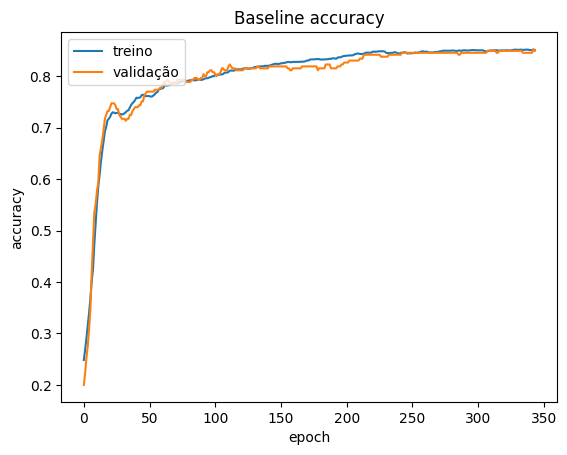

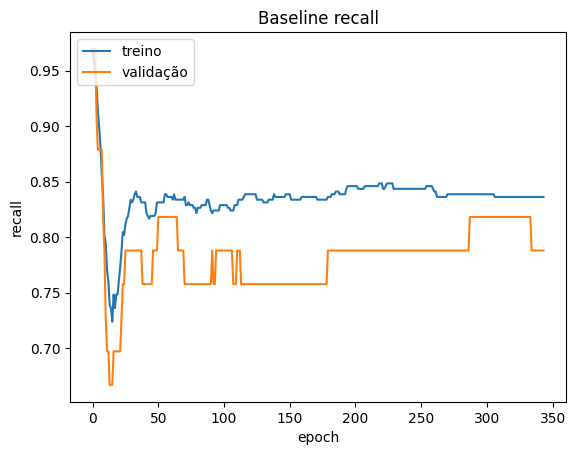

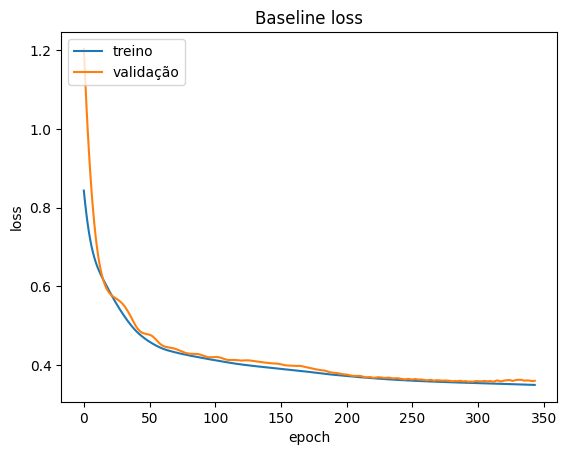

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Acurácia baseline: 0.8438
Precisão baseline: 0.5195
Recall baseline: 0.8466

Relatório de Classificação Baseline - Redes Neurais:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       944
           1       0.52      0.85      0.64       189

    accuracy                           0.84      1133
   macro avg       0.74      0.84      0.77      1133
weighted avg       0.89      0.84      0.86      1133



2025-09-26 14:09:17.523698: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [176]:
# ==========================
# Treinamento DE MODELO BASELINE COM REDE NEURAL DE 10 NEURÔNIOS NA CAMADA INTERMEDIÁRIA
# ==========================
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


# Escalonamento em TODOS os dados de treino (X_temp)
scaler_final = RobustScaler()
X_temp_scaled = scaler_final.fit_transform(X_temp_selected_features)

# Recalcula os pesos de classe
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_temp),
    y=y_temp
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Cria o modelo do zero

model_baseline = create_model(
            input_dim=X_temp_scaled.shape[1],
            hidden_layers=[4],
            dropout_rate=0.0,
            optimizer_name="adam",
            learning_rate=0.01
)


# EarlyStopping (opcional no treino final, mas pode manter)
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",   
    patience=50,
    min_delta=0.0001,
    restore_best_weights=True
)

# Treina no conjunto todo
history_baseline = model_baseline.fit(
    X_temp_scaled, y_temp,
    epochs=1200,
    validation_split=0.1,
    batch_size=X_temp_scaled.shape[0],
    class_weight=class_weights,
    verbose=1,
    callbacks=[es],
)

# Agora temos o modelo baseline


plt.plot(history_baseline.history['accuracy']) 
plt.plot(history_baseline.history['val_accuracy']) 
plt.title('Baseline accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()


plt.plot(history_baseline.history['recall']) 
plt.plot(history_baseline.history['val_recall']) 
plt.title('Baseline recall') 
plt.ylabel('recall')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()

plt.plot(history_baseline.history['loss']) 
plt.plot(history_baseline.history['val_loss']) 
plt.title('Baseline loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Fazendo previsões no conjunto de teste
X_test_scaled = scaler_final.transform(X_test_selected_features)
y_pred_proba_nn_baseline = model_baseline.predict(X_test_scaled)
y_pred_nn_padrao_baseline = (y_pred_proba_nn_baseline > 0.5).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5 se preferirmos.

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred_nn_padrao_baseline)
precision = precision_score(y_test, y_pred_nn_padrao_baseline)
recall = recall_score(y_test, y_pred_nn_padrao_baseline)

print(f"Acurácia baseline: {accuracy:.4f}")
print(f"Precisão baseline: {precision:.4f}")
print(f"Recall baseline: {recall:.4f}")

# Relatório de classificação completo
print("\nRelatório de Classificação Baseline - Redes Neurais:")
print(classification_report(y_test, y_pred_nn_padrao_baseline))


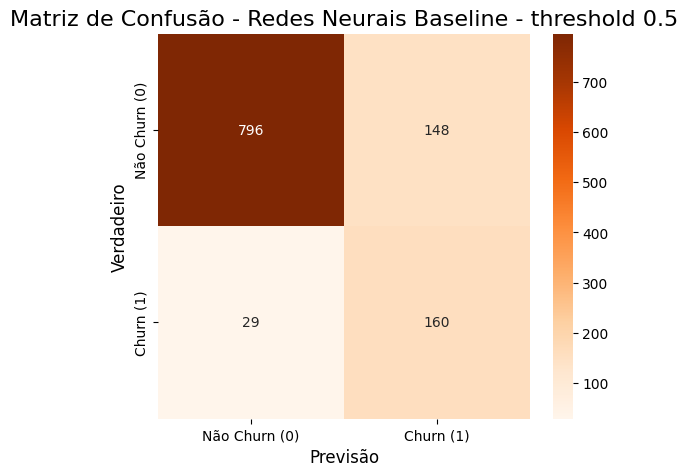

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a Matriz de Confusão
cm_nn_baseline = confusion_matrix(y_test, y_pred_nn_padrao_baseline)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn_baseline, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])

# Adicionar títulos e rótulos para clareza
plt.title('Matriz de Confusão - Redes Neurais Baseline - threshold 0.5', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()

In [178]:
# APÓS ESCOLHER AS MELHORES CONFIGURAÇÕES PARA O TREINAMENTO DO MELHOR MODELO NA ETAPA ANTERIOR, VAMOS TREINAR O MODELO INTERMEDIÁRIO COM TODOS OS DADOS DE X_TEMP:

tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Escalonamento em TODOS os dados de treino (X_temp)
scaler_final = RobustScaler()
X_temp_scaled = scaler_final.fit_transform(X_temp_selected_features)

# Recalcula os pesos de classe
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_temp),
    y=y_temp
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Cria o modelo do zero

model_2 = create_model(
            input_dim=X_temp_scaled.shape[1],
            hidden_layers=[32,16],
            dropout_rate=0.1,
            optimizer_name="adam",
            learning_rate=0.01
)


# EarlyStopping (opcional no treino final, mas pode manter)
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",   
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True
)



# Treina no conjunto todo
history_2 = model_2.fit(
    X_temp_scaled, y_temp,
    epochs=1200,
    validation_split=0.1,
    batch_size=X_temp_scaled.shape[0],
    class_weight=class_weights,
    verbose=1,
    callbacks=[es],
)

# Agora temos o modelo 2 treinado




Epoch 1/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6010 - loss: 0.6908 - precision: 0.2196 - recall: 0.5159 - val_accuracy: 0.5170 - val_loss: 0.6873 - val_precision: 0.1935 - val_recall: 0.9091
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5341 - loss: 0.6504 - precision: 0.2396 - recall: 0.7848 - val_accuracy: 0.5057 - val_loss: 0.6868 - val_precision: 0.1899 - val_recall: 0.9091
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5463 - loss: 0.6262 - precision: 0.2491 - recall: 0.8117 - val_accuracy: 0.5434 - val_loss: 0.6624 - val_precision: 0.1986 - val_recall: 0.8788
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5791 - loss: 0.6074 - precision: 0.2657 - recall: 0.8191 - val_accuracy: 0.6075 - val_loss: 0.6190 - val_precision: 0.2205 - val_recall: 0.8485
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6296 - loss: 0.5864 - precision: 0.2899 - recall: 0.7946 - val_accuracy: 0.6679 - val_loss: 0.5708 -

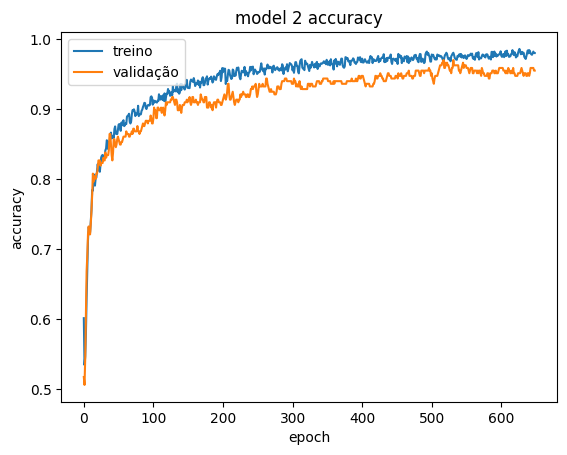

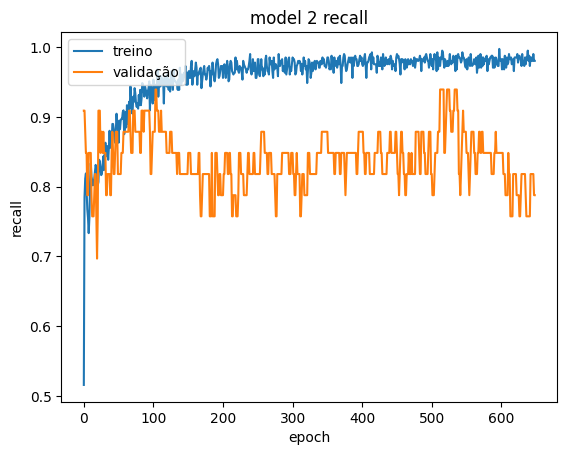

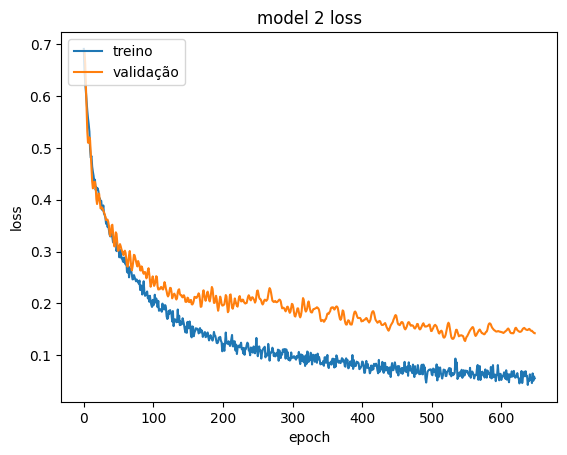

In [179]:

plt.plot(history_2.history['accuracy']) 
plt.plot(history_2.history['val_accuracy']) 
plt.title('model 2 accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()


plt.plot(history_2.history['recall']) 
plt.plot(history_2.history['val_recall']) 
plt.title('model 2 recall') 
plt.ylabel('recall')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()

plt.plot(history_2.history['loss']) 
plt.plot(history_2.history['val_loss']) 
plt.title('model 2 loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()


In [180]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Fazendo previsões no conjunto de teste
X_test_scaled = scaler_final.transform(X_test_selected_features)
y_pred_proba_nn_2 = model_2.predict(X_test_scaled)
y_pred_nn_2 = (y_pred_proba_nn_2 > 0.5).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5 se preferirmos.

# Calculando as métricas
accuracy_2 = accuracy_score(y_test, y_pred_nn_2)
precision_2 = precision_score(y_test, y_pred_nn_2)
recall_2 = recall_score(y_test, y_pred_nn_2)

print(f"Acurácia modelo 2: {accuracy:.4f}")
print(f"Precisão modelo 2: {precision:.4f}")
print(f"Recall modelo 2: {recall:.4f}")

# Relatório de classificação completo
print("\nRelatório de Classificação - Modelo 2 de Redes Neurais encontrado:")
print(classification_report(y_test, y_pred_nn_2))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia modelo 2: 0.8438
Precisão modelo 2: 0.5195
Recall modelo 2: 0.8466

Relatório de Classificação - Modelo 2 de Redes Neurais encontrado:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       944
           1       0.80      0.90      0.85       189

    accuracy                           0.95      1133
   macro avg       0.89      0.93      0.91      1133
weighted avg       0.95      0.95      0.95      1133



2025-09-26 14:10:23.289495: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


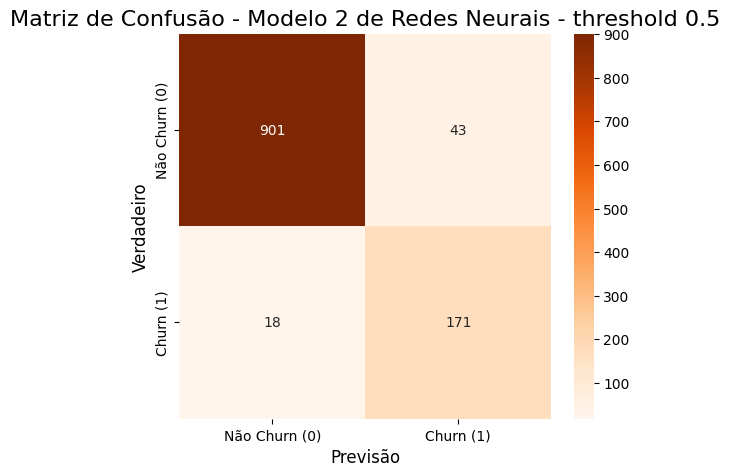

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a Matriz de Confusão
cm_nn_2 = confusion_matrix(y_test, y_pred_nn_2)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn_2, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])

# Adicionar títulos e rótulos para clareza
plt.title('Matriz de Confusão - Modelo 2 de Redes Neurais - threshold 0.5', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()

In [182]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular a ROC curve
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2)
fpr_nn_baseline, tpr_nn_baseline, thresholds_nn_baseline = roc_curve(y_test, y_pred_proba_nn_baseline)

# Calcular a área sob a curva (AUC)
roc_auc_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2)
roc_auc_nn_baseline = roc_auc_score(y_test, y_pred_proba_nn_baseline)




In [183]:
# TENTANDO MELHORAR AINDA MAIS OS RESULTADOS - ajustando o dropout rate e a função de ativação intermediária

tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# # Escalonamento em TODOS os dados de treino (X_temp)
# scaler_final = RobustScaler()
# X_temp_scaled = scaler_final.fit_transform(X_temp_selected_features)

# Recalcula os pesos de classe
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_temp),
    y=y_temp
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Cria o modelo do zero

model_3 = create_model(
            input_dim=X_temp_scaled.shape[1],
            hidden_layers=[32,16],
            dropout_rate=0.05,
            optimizer_name="adam",
            learning_rate=0.01,
            output_activation='sigmoid',
            intermediate_activation='tanh',
            loss_type='binary_crossentropy'
)



# EarlyStopping (opcional no treino final, mas pode manter)
es_3 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",   
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True
)



# Treina no conjunto todo
history_3 = model_3.fit(
    X_temp_scaled, y_temp,
    epochs=1200,
    validation_split=0.1,
    batch_size=X_temp_scaled.shape[0],
    class_weight=class_weights,
    verbose=1,
    callbacks=[es_3],
)





Epoch 1/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4769 - loss: 0.7010 - precision: 0.2076 - recall: 0.7237 - val_accuracy: 0.5434 - val_loss: 0.7051 - val_precision: 0.1986 - val_recall: 0.8788
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5362 - loss: 0.6416 - precision: 0.2420 - recall: 0.7946 - val_accuracy: 0.6226 - val_loss: 0.6360 - val_precision: 0.2231 - val_recall: 0.8182
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6044 - loss: 0.6036 - precision: 0.2725 - recall: 0.7775 - val_accuracy: 0.7170 - val_loss: 0.5700 - val_precision: 0.2857 - val_recall: 0.8485
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6709 - loss: 0.5752 - precision: 0.3114 - recall: 0.7531 - val_accuracy: 0.7623 - val_loss: 0.5215 - val_precision: 0.3214 - val_recall: 0.8182
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7285 - loss: 0.5442 - precision: 0.3618 - recall: 0.7555 - val_accuracy: 0.7736 - val_loss: 0.4914 -

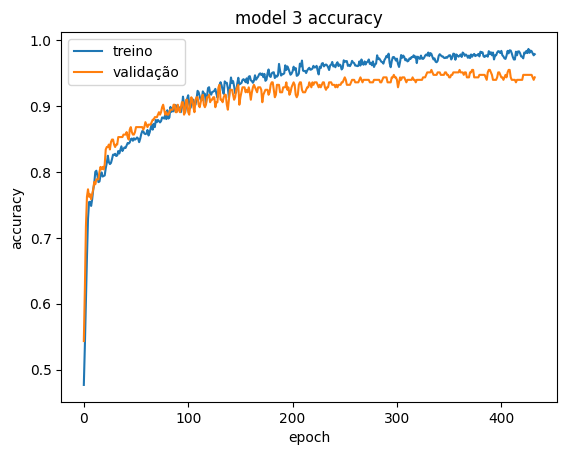

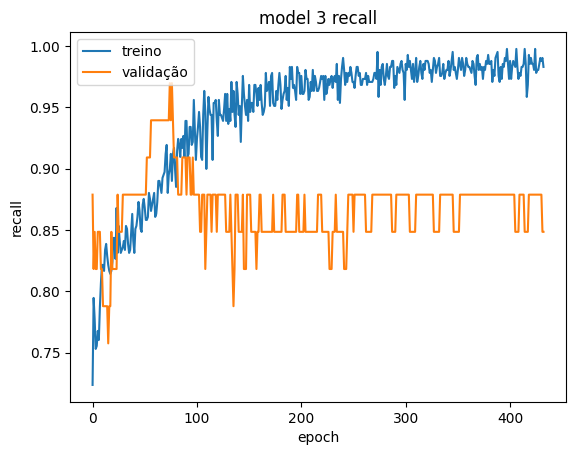

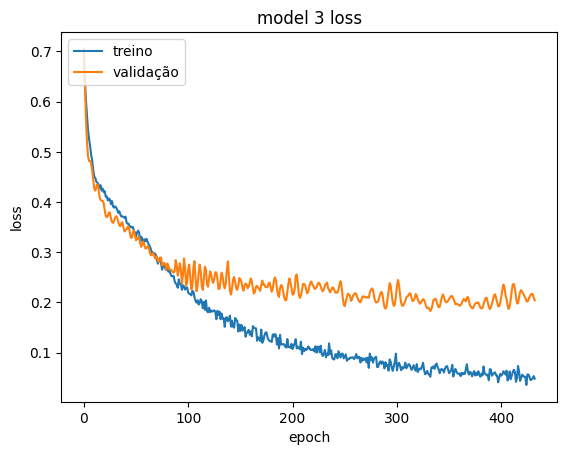

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia modelo 3: 0.9453
Precisão modelo 3: 0.7953
Recall modelo 3: 0.9048

Relatório de Classificação - Modelo 3 de Redes Neurais encontrado:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       944
           1       0.80      0.90      0.85       189

    accuracy                           0.95      1133
   macro avg       0.89      0.93      0.91      1133
weighted avg       0.95      0.95      0.95      1133



2025-09-26 14:11:10.492993: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [184]:

plt.plot(history_3.history['accuracy']) 
plt.plot(history_3.history['val_accuracy']) 
plt.title('model 3 accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()


plt.plot(history_3.history['recall']) 
plt.plot(history_3.history['val_recall']) 
plt.title('model 3 recall') 
plt.ylabel('recall')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()

plt.plot(history_3.history['loss']) 
plt.plot(history_3.history['val_loss']) 
plt.title('model 3 loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()



y_pred_proba_nn_3 = model_3.predict(X_test_scaled)
y_pred_nn_3 = (y_pred_proba_nn_3 > 0.5).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5 se preferirmos.

# Calculando as métricas
accuracy_3 = accuracy_score(y_test, y_pred_nn_3)
precision_3 = precision_score(y_test, y_pred_nn_3)
recall_3 = recall_score(y_test, y_pred_nn_3)

print(f"Acurácia modelo 3: {accuracy_3:.4f}")
print(f"Precisão modelo 3: {precision_3:.4f}")
print(f"Recall modelo 3: {recall_3:.4f}")

# Relatório de classificação completo
print("\nRelatório de Classificação - Modelo 3 de Redes Neurais encontrado:")
print(classification_report(y_test, y_pred_nn_3))




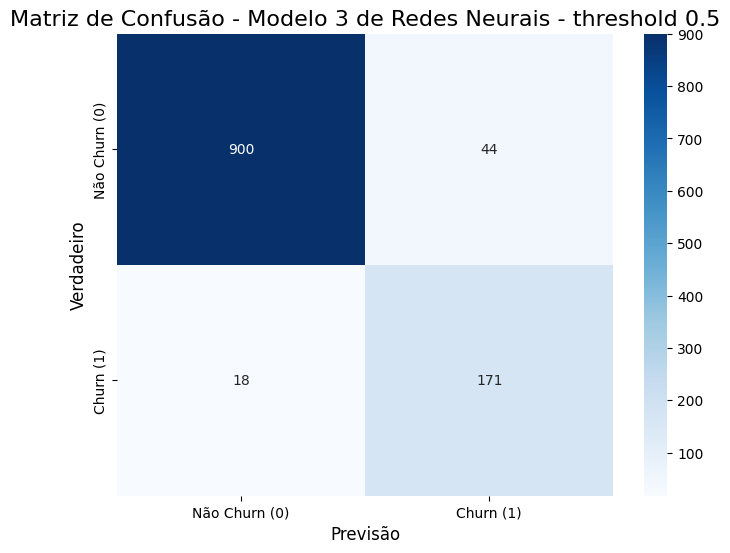

In [185]:
cm_3 = confusion_matrix(y_test, y_pred_nn_3)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusão - Modelo 3 de Redes Neurais - threshold 0.5', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()



# Calcular a ROC curve final na comparação
fpr_nn_3, tpr_nn_3, thresholds_nn_3 = roc_curve(y_test, y_pred_proba_nn_3)


# Calcular a área sob a curva (AUC)
roc_auc_nn_3 = roc_auc_score(y_test, y_pred_proba_nn_3)





In [ ]:
# TENTANDO MELHORAR AINDA MAIS OS RESULTADOS (modelo 4) - ajustando a arquitetura - camadas intermediárias e número de neurônios e otimizador

tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# # Escalonamento em TODOS os dados de treino (X_temp)
# scaler_final = RobustScaler()
# X_temp_scaled = scaler_final.fit_transform(X_temp_selected_features)

# Recalcula os pesos de classe
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_temp),
    y=y_temp
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Cria o modelo do zero

model_4 = create_model(
            input_dim=X_temp_scaled.shape[1],
            hidden_layers=[64, 32, 8, 4],
            dropout_rate=0.05,
            optimizer_name="adam",
            learning_rate=0.003,
            output_activation='sigmoid',
            intermediate_activation='tanh',
            loss_type='binary_crossentropy'
)



# EarlyStopping (opcional no treino final, mas pode manter)
es_4 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",   
    patience=200,
    min_delta=0.0001,
    restore_best_weights=True
)



# Treina no conjunto todo
history_4 = model_4.fit(
    X_temp_scaled, y_temp,
    epochs=6000,
    validation_split=0.1,
    batch_size=X_temp_scaled.shape[0],
    class_weight=class_weights,
    verbose=1,
    callbacks=[es_4],
)





Epoch 1/6000


2025-09-26 21:19:11.115598: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4040 - loss: 0.8510 - precision: 0.1106 - recall: 0.3496 - val_accuracy: 0.3434 - val_loss: 0.8380 - val_precision: 0.1148 - val_recall: 0.6364
Epoch 2/6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3792 - loss: 0.7611 - precision: 0.1609 - recall: 0.6186 - val_accuracy: 0.3472 - val_loss: 0.8150 - val_precision: 0.1277 - val_recall: 0.7273
Epoch 3/6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4141 - loss: 0.7149 - precision: 0.1983 - recall: 0.7897 - val_accuracy: 0.4226 - val_loss: 0.7752 - val_precision: 0.1552 - val_recall: 0.8182
Epoch 4/6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4701 - loss: 0.6674 - precision: 0.2208 - recall: 0.8215 - val_accuracy: 0.4906 - val_loss: 0.7234 - val_precision: 0.1731 - val_recall: 0.8182
Epoch 5/6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5379 - loss: 0.6436 - precision: 0.2408 - recall: 0.7824 - val_accuracy: 0.5962 - val_loss: 0.6719 - val_precis

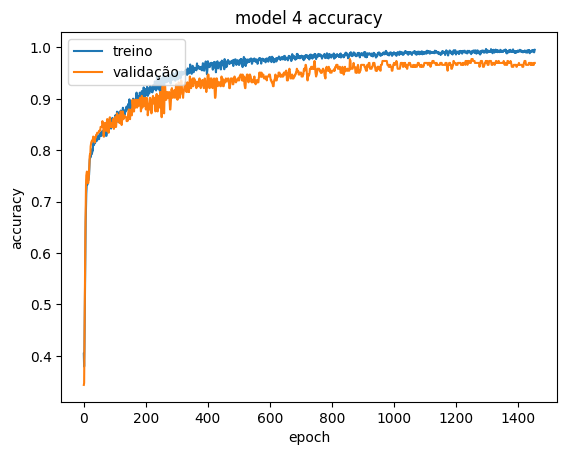

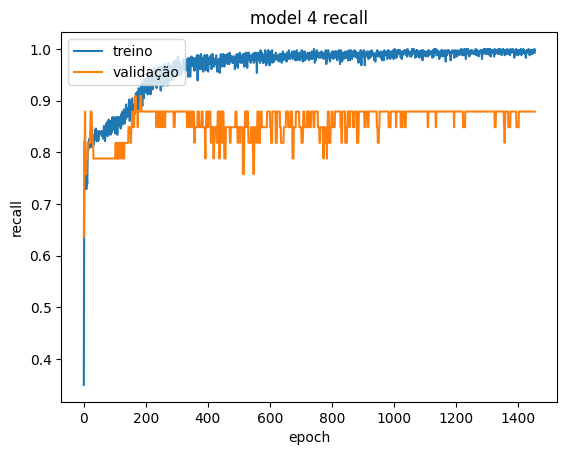

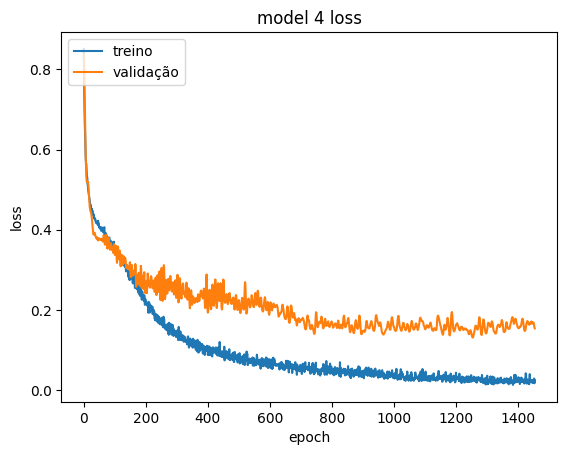

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Acurácia modelo 4: 0.9691
Precisão modelo 4: 0.8812
Recall modelo 4: 0.9418

Relatório de Classificação - Modelo 4 de Redes Neurais encontrado:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       944
           1       0.88      0.94      0.91       189

    accuracy                           0.97      1133
   macro avg       0.93      0.96      0.95      1133
weighted avg       0.97      0.97      0.97      1133



2025-09-26 21:24:29.293923: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [247]:

plt.plot(history_4.history['accuracy']) 
plt.plot(history_4.history['val_accuracy']) 
plt.title('model 4 accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()


plt.plot(history_4.history['recall']) 
plt.plot(history_4.history['val_recall']) 
plt.title('model 4 recall') 
plt.ylabel('recall')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()

plt.plot(history_4.history['loss']) 
plt.plot(history_4.history['val_loss']) 
plt.title('model 4 loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['treino', 'validação'], loc='upper left') 
plt.show()



y_pred_proba_nn_4 = model_4.predict(X_test_scaled)
y_pred_nn_4 = (y_pred_proba_nn_4 > 0.5).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5 se preferirmos.

# Calculando as métricas
accuracy_4 = accuracy_score(y_test, y_pred_nn_4)
precision_4 = precision_score(y_test, y_pred_nn_4)
recall_4 = recall_score(y_test, y_pred_nn_4)

print(f"Acurácia modelo 4: {accuracy_4:.4f}")
print(f"Precisão modelo 4: {precision_4:.4f}")
print(f"Recall modelo 4: {recall_4:.4f}")

# Relatório de classificação completo
print("\nRelatório de Classificação - Modelo 4 de Redes Neurais encontrado:")
print(classification_report(y_test, y_pred_nn_4))




In [251]:
import joblib

model_4.save("model_final_nn.keras")
model_4.save("model_final_nn.h5")
joblib.dump(scaler_final, "robust_scaler_final.pkl")
## para carregar depois:
# from keras.models import load_model
# model_final = load_model("model_final_nn.keras")
## ou:
# model_final = load_model("model_final_nn.h5")




['robust_scaler_final.pkl']

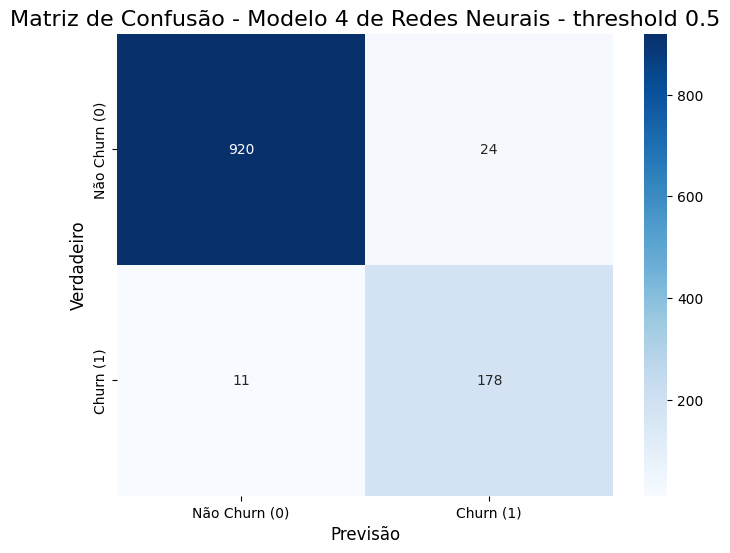

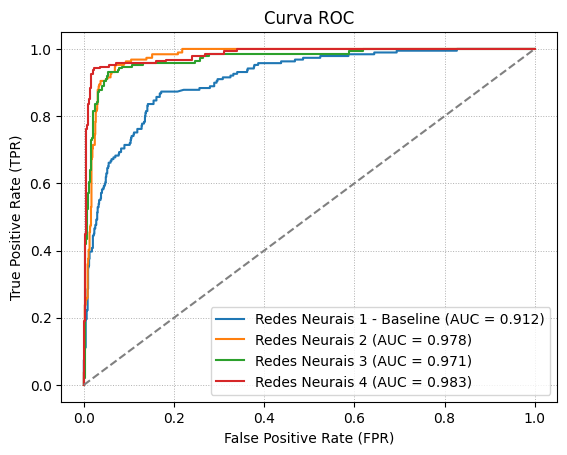

In [249]:
cm_4 = confusion_matrix(y_test, y_pred_nn_4)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusão - Modelo 4 de Redes Neurais - threshold 0.5', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()



# Calcular a ROC curve final na comparação
fpr_nn_4, tpr_nn_4, thresholds_nn_4 = roc_curve(y_test, y_pred_proba_nn_4)


# Calcular a área sob a curva (AUC)
roc_auc_nn_4 = roc_auc_score(y_test, y_pred_proba_nn_4)


# Plotar a curva
plt.figure()
plt.plot(fpr_nn_baseline, tpr_nn_baseline, label=f'Redes Neurais 1 - Baseline (AUC = {roc_auc_nn_baseline:.3f})')
plt.plot(fpr_nn_2, tpr_nn_2, label=f'Redes Neurais 2 (AUC = {roc_auc_nn_2:.3f})')
plt.plot(fpr_nn_3, tpr_nn_3, label=f'Redes Neurais 3 (AUC = {roc_auc_nn_3:.3f})')
plt.plot(fpr_nn_4, tpr_nn_4, label=f'Redes Neurais 4 (AUC = {roc_auc_nn_4:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha aleatória (baseline)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True, linestyle=':', linewidth=0.7)
plt.show()


/home/rosana/.conda/envs/PD_env_redes_neurais/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


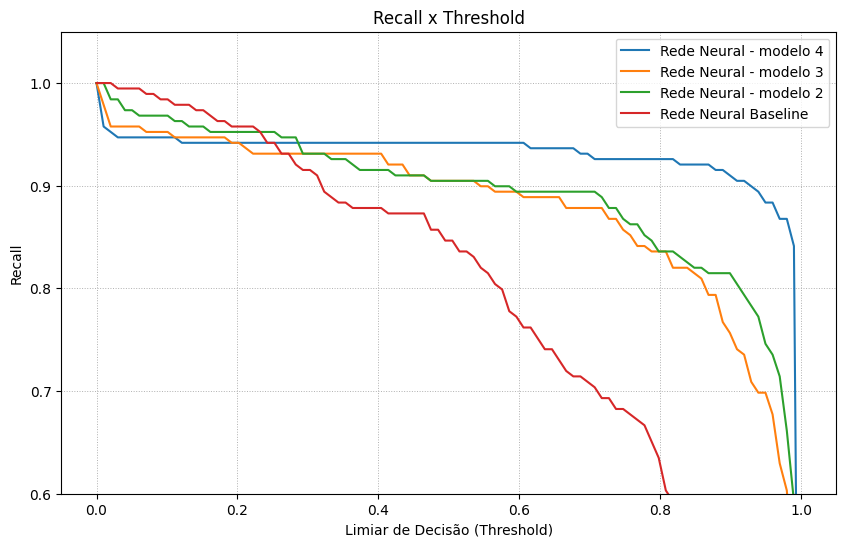

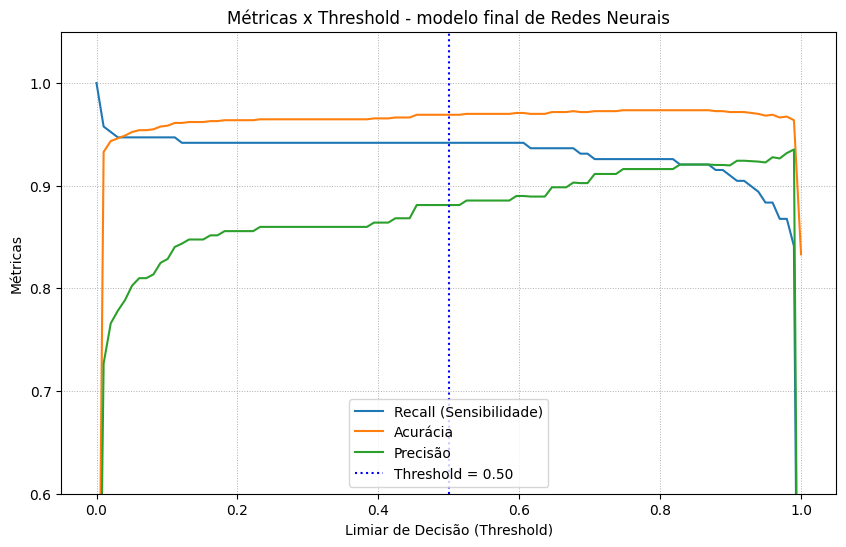

In [250]:
# comparando o recall em vários thresholds:

from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

thresholds = np.linspace(0, 1, 100)
recalls_nn_4 = []
accuracy_nn_4 = []
precision_nn_4 = []
f1_score_nn_4 = []

recalls_nn_baseline = []
recalls_nn_2 = []
recalls_nn_3 = []

for t in thresholds:
    y_pred_nn_4 = (y_pred_proba_nn_4 >= t).astype(int)
    y_pred_nn_3 = (y_pred_proba_nn_3 >= t).astype(int)
    y_pred_nn_2 = (y_pred_proba_nn_2 >= t).astype(int)
    y_pred_nn_baseline = (y_pred_proba_nn_baseline >= t).astype(int)
    
    recalls_nn_4.append(recall_score(y_test, y_pred_nn_4))
    accuracy_nn_4.append(accuracy_score(y_test, y_pred_nn_4))
    precision_nn_4.append(precision_score(y_test, y_pred_nn_4))
    f1_score_nn_4.append(f1_score(y_test, y_pred_nn_4))
    recalls_nn_baseline.append(recall_score(y_test, y_pred_nn_baseline))
    recalls_nn_2.append(recall_score(y_test, y_pred_nn_2))
    recalls_nn_3.append(recall_score(y_test, y_pred_nn_3))


plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls_nn_4, label='Rede Neural - modelo 4')
plt.plot(thresholds, recalls_nn_3, label='Rede Neural - modelo 3')
plt.plot(thresholds, recalls_nn_2, label='Rede Neural - modelo 2')
plt.plot(thresholds, recalls_nn_baseline, label='Rede Neural Baseline')
plt.xlabel('Limiar de Decisão (Threshold)')
plt.ylabel('Recall')
plt.title('Recall x Threshold')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.7)
plt.ylim(0.6)  # <-- define limite inferior do eixo y
plt.show()




import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls_nn_4, label='Recall (Sensibilidade)')
plt.plot(thresholds, accuracy_nn_4, label='Acurácia')
# plt.plot(thresholds, f1_score_nn, label='F1 Score')
plt.plot(thresholds, precision_nn_4, label='Precisão')

# Linhas verticais

plt.axvline(x=0.5, color='blue', linestyle=':', label='Threshold = 0.50')

plt.xlabel('Limiar de Decisão (Threshold)')
plt.ylabel('Métricas')
plt.title('Métricas x Threshold - modelo final de Redes Neurais')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.7)
plt.ylim(0.6)  # limite inferior do eixo y
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# import random
# from sklearn.utils import class_weight
# from sklearn.metrics import f1_score, recall_score
# from sklearn.model_selection import train_test_split # Adicionado para exemplo
# from sklearn.preprocessing import StandardScaler # Adicionado para exemplo


# SEED=202

# dropout_rates = [0.05, 0.07, 0.1]
# optimizer_names = ["nadam", "adam"]
# learning_rates = [0.003, 0.005, 0.007]
# patience_values = [200] 
# min_deltas = [0.0001, 0.0005, 0.001]

# results_list = []

# # Iterando sobre todas as combinações de hiperparâmetros
# for dropout_rate in dropout_rates:
#     for optimizer_name in optimizer_names:
#         for learning_rate in learning_rates:
#             for min_delta in min_deltas:
#                 # O valor de patience é fixo, então o pegamos da lista
#                 patience = patience_values[0]

#                 print("-" * 60)
#                 print(f"Iniciando treino com a combinação:")
#                 print(f"dropout_rate: {dropout_rate}, optimizer_name: '{optimizer_name}', "
#                       f"learning_rate: {learning_rate}, min_delta: {min_delta}")
#                 print("-" * 60)

#                 # Definindo as sementes para reprodutibilidade
#                 tf.random.set_seed(SEED)
#                 np.random.seed(SEED)
#                 random.seed(SEED)

#                 # Calculando os pesos das classes para lidar com dados desbalanceados
#                 class_weights = class_weight.compute_class_weight(
#                     'balanced',
#                     classes=np.unique(y_temp),
#                     y=y_temp
#                 )
#                 class_weights = {i: class_weights[i] for i in range(len(class_weights))}

#                 # Criando o modelo com os hiperparâmetros da iteração atual
#                 model_4 = create_model(
#                     input_dim=X_temp_scaled.shape[1],
#                     hidden_layers=[64, 32, 8, 4],
#                     dropout_rate=dropout_rate,
#                     optimizer_name=optimizer_name,
#                     learning_rate=learning_rate,
#                     output_activation='sigmoid',
#                     intermediate_activation='tanh',
#                     loss_type='binary_crossentropy'
#                 )

#                 # Definindo o callback EarlyStopping
#                 es_4 = tf.keras.callbacks.EarlyStopping(
#                     monitor="val_loss",
#                     patience=patience,
#                     min_delta=min_delta,
#                     restore_best_weights=True
#                 )

#                 # Treinando o modelo
#                 history_4 = model_4.fit(
#                     X_temp_scaled, y_temp,
#                     epochs=6000,
#                     validation_split=0.1,
#                     batch_size=X_temp_scaled.shape[0],
#                     class_weight=class_weights,
#                     verbose=0,  # Alterado para 0 para não poluir a saída do loop
#                     callbacks=[es_4],
#                 )

#                 # Fazendo previsões no conjunto de teste
#                 y_pred_proba_nn_4 = model_4.predict(X_test_scaled)
#                 y_pred_nn_4 = (y_pred_proba_nn_4 > 0.5).astype(int)

#                 # Calculando as métricas de F1-score e Recall
#                 f1 = f1_score(y_test, y_pred_nn_4)
#                 recall = recall_score(y_test, y_pred_nn_4)

#                 print(f"Resultados: F1-Score = {f1:.4f}, Recall = {recall:.4f}\n")

#                 # Adicionando os resultados à lista
#                 results_list.append({
#                     'dropout_rate': dropout_rate,
#                     'optimizer_name': optimizer_name,
#                     'learning_rate': learning_rate,
#                     'patience': patience,
#                     'min_delta': min_delta,
#                     'f1_score': f1,
#                     'recall': recall
#                 })

# # Convertendo a lista de resultados em um DataFrame do Pandas
# results_df_fine_tuning = pd.DataFrame(results_list)

# # Exibindo o DataFrame com os resultados
# print("\n--- Tabela de Resultados ---")
# print(results_df_fine_tuning)

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.0001
------------------------------------------------------------


2025-09-26 19:57:28.616576: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 19:58:55.994886: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8680, Recall = 0.9048

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:00:23.018707: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8680, Recall = 0.9048

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:01:46.004116: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8731, Recall = 0.9101

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:02:49.511326: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8816, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:03:53.141751: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8816, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:04:56.825061: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8816, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


2025-09-26 20:06:06.395126: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8715, Recall = 0.9153

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:07:15.257095: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8715, Recall = 0.9153

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:08:24.597731: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8715, Recall = 0.9153

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:10:44.757967: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9105, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:13:04.965663: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9105, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:14:38.970598: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8974, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:16:02.197056: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8883, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:17:28.955658: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8883, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:18:50.851137: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8861, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:19:45.745896: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8946, Recall = 0.9206

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:20:40.499800: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8946, Recall = 0.9206

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.05, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:21:24.696882: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8706, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:23:04.735981: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8838, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:24:43.401930: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8816, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:26:23.793618: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8838, Recall = 0.9259

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:28:11.211347: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9039, Recall = 0.9206

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:30:03.988966: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9039, Recall = 0.9206

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:31:54.401100: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9039, Recall = 0.9206

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:32:48.815357: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8800, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:33:44.271509: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8800, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:34:37.533812: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8800, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:36:39.361033: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8911, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.0005
------------------------------------------------------------
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

2025-09-26 20:38:43.407006: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Resultados: F1-Score = 0.8911, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:40:48.816876: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8911, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:42:39.923531: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8987, Recall = 0.9153

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:44:29.808790: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8987, Recall = 0.9153

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:45:51.319004: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8866, Recall = 0.9101

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:46:53.826735: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8579, Recall = 0.9101

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:47:42.801560: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8579, Recall = 0.9101

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.07, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:48:30.284010: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8579, Recall = 0.9101

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:50:14.098455: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8719, Recall = 0.9365

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:51:56.450242: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8719, Recall = 0.9365

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.003, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:53:40.071110: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8719, Recall = 0.9365

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:54:52.027862: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8747, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:56:02.475811: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8747, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.005, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 20:57:12.466832: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8683, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


2025-09-26 20:58:19.366307: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8822, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 20:59:27.471516: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8822, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'nadam', learning_rate: 0.007, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


2025-09-26 21:00:35.743964: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8822, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

2025-09-26 21:03:09.930809: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Resultados: F1-Score = 0.9036, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 21:05:42.652770: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9036, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.003, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 21:08:16.554826: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9036, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 21:10:09.328266: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8980, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 21:12:00.503418: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8980, Recall = 0.9312

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.005, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 21:13:47.136646: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.9059, Recall = 0.9418

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.0001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 21:15:06.340347: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8766, Recall = 0.9206

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.0005
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-26 21:16:25.922762: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8766, Recall = 0.9206

------------------------------------------------------------
Iniciando treino com a combinação:
dropout_rate: 0.1, optimizer_name: 'adam', learning_rate: 0.007, min_delta: 0.001
------------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-09-26 21:17:44.889601: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Resultados: F1-Score = 0.8766, Recall = 0.9206


--- Tabela de Resultados ---
    dropout_rate optimizer_name  learning_rate  patience  min_delta  f1_score  \
0           0.05          nadam          0.003       200     0.0001  0.868020   
1           0.05          nadam          0.003       200     0.0005  0.868020   
2           0.05          nadam          0.003       200     0.0010  0.873096   
3           0.05          nadam          0.005       200     0.0001  0.881612   
4           0.05          nadam          0.005       200     0.0005  0.881612   
5           0.05          nadam          0.005       200     0.0010  0.881612   
6           0.05          nadam          0.007       200     0.0001  0.871537   
7           0.05          nadam          0.007       200     0.0005  0.871537   
8           0.05          nadam          0.007       200     0.0010  0.871537   
9           0.05           adam          0.003       200     0.0001  0.910486   
10          0.05           adam

In [ ]:
# results_df_fine_tuning

# results_df_fine_tuning.to_csv("9-fine-tuning.csv", index=False)

## Referências

